In [2]:
import numpy as np
import pandas as pd
import random as rm
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Set up the data directory path:
data_path = Path('C:/Users/campb/OneDrive/Documents/University_ENGSCI/4th Year/ResearchProject/TennisData') 
get_path = lambda fn: data_path / fn

In [3]:
# Create a file to load data in a consistent manner:
def load_data(fn):
    return pd.read_csv(fn)

In [4]:
# Load data:
TennisData2021M = load_data(get_path('2021M.csv')) 
TennisData2020M = load_data(get_path('2020M.csv')) 
TennisData2019M = load_data(get_path('2019M.csv')) 
TennisData2018M = load_data(get_path('2018M.csv')) 
TennisData2017M = load_data(get_path('2017M.csv')) 
TennisData2021W = load_data(get_path('2021W.csv')) 
TennisData2020W = load_data(get_path('2020W.csv')) 
TennisData2019W = load_data(get_path('2019W.csv')) 
TennisData2018W = load_data(get_path('2018W.csv')) 
TennisData2017W = load_data(get_path('2017W.csv')) 

In [5]:
# Merge Men's and Women's data files:
TennisDataMens = pd.concat([TennisData2017M, TennisData2018M, TennisData2019M, TennisData2020M, TennisData2021M], axis = 0)
TennisDataWomens = pd.concat([TennisData2017W, TennisData2018W, TennisData2019W, TennisData2020W, TennisData2021W], axis = 0)

In [9]:
# Check for missing data:
print(TennisDataMens[['MaxW', 'MaxL']].isna().sum())
print(TennisDataWomens[['MaxW', 'MaxL']].isna().sum())

MaxW    5
MaxL    5
dtype: int64
MaxW    8
MaxL    9
dtype: int64


In [61]:
# Extract all games with max odds: 
TDM = TennisDataMens.loc[TennisDataMens['MaxL'].isna() == False, :]
TDW = TennisDataWomens.loc[TennisDataWomens['MaxL'].isna() == False, :]

In [67]:
# Compute the percentage of games where arbitrage was possible:
def Arbitrage(data):
    ImpliedOdds = (1. / data['MaxW']) + (1. / data['MaxL'])
    Count = (ImpliedOdds < 1.).sum()
    return ((Count / len(data)) * 100)

In [68]:
# Compute the overall percentage of games where arbitrage is possible:
PropM = Arbitrage(TDM)
PropW = Arbitrage(TDW)

print(PropM)
print(PropW)

48.49478390461997
43.133276377616404


In [77]:
# See if there is a trend in the proportion of games where arbitrage is possible:
YearsM = [TennisData2017M, TennisData2018M, TennisData2019M, TennisData2020M, TennisData2021M]
YearsW = [TennisData2017W, TennisData2018W, TennisData2019W, TennisData2020W, TennisData2021W]
PropsM = []
PropsW = []

for i in YearsM:
    PropsM.append(Arbitrage(i))
for j in YearsW:
    PropsW.append(Arbitrage(j))

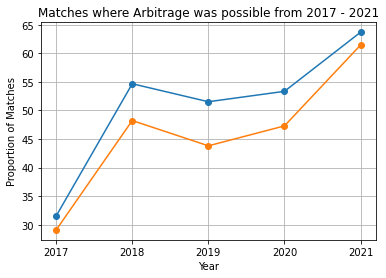

In [84]:
# Create a plot of the proportion vs year:
Years = [2017, 2018, 2019, 2020, 2021]
plt.plot(Years, PropsM, Years, PropsW, marker = 'o')
plt.xticks(Years)
plt.xlabel('Year')
plt.ylabel('Proportion of Matches')
plt.title('Matches where Arbitrage was possible from 2017 - 2021')
plt.grid()

# Pre-processing of Data:

## Features needed:
1. 

In [86]:
# Look at the features we have:
TennisDataMens.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'EXW', 'EXL', 'LBW', 'LBL', 'PSW',
       'PSL', 'MaxW', 'MaxL', 'AvgW', 'AvgL'],
      dtype='object')

# Markov Model:

In [375]:
p = 0.6
np.random.rand()

0.43085778489239424

In [343]:
# Possible States:
States = ['0-0', '15-0', '30-0', '40-0', 'GameS', '0-15', '15-15', '30-15', '40-15', '0-30', '15-30', '30-30', '40-30',
          '0-40', '15-40', '30-40', 'Deuce', 'GameR']

# Transitions:
TransitionMatrix = np.zeros((18,18), dtype = float)
for i in range(len(TransitionMatrix)):
    # Game point for Server: (Every 4th row)
    if i % 4 == 3:
        TransitionMatrix[i, 16] = p
        
    # Game point for Returner: (Rows 12:14)
    elif ((i > 11) and (i < 15)):
        TransitionMatrix[i,i+1] = p
        TransitionMatrix[i,17] = 1-p   
        
    # Duece: (Row 16)
    elif i == 15:
        TransitionMatrix[i, 11] = p
        TransitionMatrix[i, 14] = 1-p
        
    # Game over:
    elif i > 15:
        TransitionMatrix[i,i] = 1

    # Not Game Point:
    else:
        TransitionMatrix[i,i+1] = p
        TransitionMatrix[i,i+4] = 1-p

In [376]:
# Compute the steady-state distributions using "infinite sums":
PrServerWins = pow(p, 4) * (15 - 24*p + 10*pow(p, 2)) + 20 * pow(p, 5) * pow((1 - p), 3) / (pow(p, 2) - p + 1)
print(PrServerWins)

# Without Deuce:
PrS = pow(p, 4) * (35 - 84*p + 70*pow(p, 2) - 20*pow(p, 3))
print(PrS)

# Spiko's way:
SpikoPrS = pow(p, 2) / (pow(p, 2) + pow((1-p), 2))
print(SpikoPrS)


0.6752842105263159
0.7102080000000002
0.6923076923076923


In [356]:
# Compute the steady state distributions:
P = np.transpose(TransitionMatrix)

# Replace last equation:
P[1, :] = np.ones((1,len(P)))

# Remove variables from RHS vector:
for i in range(len(P) - 1):
    P[i, i] = P[i, i] - 1

RHS = np.zeros((len(P), 1))
RHS[-1] =  1

# Compute the Steady state:
PT = np.linalg.inv(P)
SS = np.matmul(PT, RHS)
SS

array([[ 0.00000000e+00],
       [ 1.00000000e+00],
       [ 8.75000000e-02],
       [ 7.65625000e-03],
       [ 0.00000000e+00],
       [ 3.75000000e-02],
       [ 6.56250000e-03],
       [ 5.74218750e-04],
       [ 0.00000000e+00],
       [ 1.40625000e-03],
       [ 3.69140625e-04],
       [ 3.22998047e-05],
       [ 0.00000000e+00],
       [ 5.27343750e-05],
       [ 1.84570313e-05],
       [ 1.61499023e-06],
       [ 8.26438354e-04],
       [-1.42499904e-01]])

In [132]:
def MarkovChainPoint(p):
    prob = np.random.rand()
    if prob <= p:
        Winner = 'Server'
    else:
        Winner = 'Returner'
    return Winner

In [138]:
def MarkovChainGame(p):
    # Initial state does not matter as transition probabilites are the same:
    SPts = 0
    RPts = 0
    while ((SPts < 4) and (RPts < 4)):
        if MarkovChainPoint(p) == 'Server':
            # Point was won by server:
            SPts = SPts + 1
        else:
            # Point was won by returner:
            RPts = RPts + 1
        # Check for 'duece':
        if ((SPts == 3) and (RPts == 3)):
            count = 0
            while (abs(count) != 2):
                if MarkovChainPoint(p) == 'Server':
                    count = count + 1
                else:
                    count = count - 1
            # Check who won the duece battle:
            if count == 2:
                # Server won:
                SPts = SPts + 1
            else:
                RPts = RPts + 1
    # Find out who won:
    if SPts == 4:
        Winner = 'Server'
    else:
        Winner = 'Returner'
    # Return the winner:
    return (Winner)     

In [134]:
def MarkovChainSet(pi, pj, FirstServer, FirstTo):
    # Initial state is who is serving first (i or j):
    if (FirstServer == 'i'):
        Serving = 'i'
    else:
        Serving = 'j'
    iGames = 0
    jGames = 0
    while ((iGames < 6) and (jGames < 6)):
        if Serving == 'i':
            # Player A Serving:
            if MarkovChainGame(pi) == 'Server':
                iGames = iGames + 1
            else:
                jGames = jGames + 1
            
            # Change Server:
            Serving = 'j'
        else:
            # Player B Serving:
            if MarkovChainGame(pj) == 'Returner':
                iGames = iGames + 1
            else:
                jGames = jGames + 1 
            
            # Change Server:
            Serving = 'i'

    # Check for 'tie-breaker':
    if (abs(iGames - jGames) < 2):
        # Play another game:
        if Serving == 'i':
            if MarkovChainGame(pi) == 'Server':
                iGames = iGames + 1
            else:
                jGames = jGames + 1
            Serving == 'j'
        else:
            if MarkovChainGame(pj) == 'Returner':
                iGames = iGames + 1
            else:
                jGames = jGames + 1 
            Serving == 'i'   
            
        # Check if a tie-breaker is needed: (set score = 6-6)
        if ((iGames == 6) and (jGames == 6)):
            # A Tie-Breaker is needed:
            Winner = MarkovChainTieBreaker(pi, pj, Serving, FirstTo)
            # Update set score:
            if Winner == 'i':
                iGames = 7
                jGames = 5
            else:
                iGames = 5
                jGames = 7
            # The server needs to be changed for the next set:
            if Serving == 'i':
                Serving = 'j'
            else:
                Serving = 'i'
        else:
            # Won won the 12th game:
            if iGames == 7:
                Winner = 'i'
            else:
                Winner = 'j'
    else:
        # See who won the set:
        if iGames == 6:
            Winner = 'i'
        else:
            Winner = 'j'
    
    SetScore = [iGames, jGames]
    # Return the winner, set score and player to start serving in the next set:
    return (Winner, SetScore, Serving)

In [197]:
def MarkovChainTieBreaker(pi, pj, Serving, FirstTo):
    # FirstTo tells us if it is a 7 or 10 point tie breaker ("normal" or "super" TB)
    # The person that recieved in the 12th game of the set starts serving
    # The serving goes as follows: (let A = the person with service initially)
    # Player A, Player B, Player B, Player A, Player A, Player B, Player B, Player A, Player A...
    iPoints = 0
    jPoints = 0
    
    # Perform first point:
    if Serving == 'i':
        if MarkovChainPoint(pi) == 'Server':
            iPoints = iPoints + 1
        else:
            jPoints = jPoints + 1
        Serving = 'j'
    else:
        if MarkovChainPoint(pj) == 'Returner':
            iPoints = iPoints + 1
        else:
            jPoints = jPoints + 1 
        Serving = 'i'
    
    Point = 2
    while ((iPoints < FirstTo) and (jPoints < FirstTo)):
        if Serving == 'i':
            if MarkovChainPoint(pi) == 'Server':
                iPoints = iPoints + 1
            else:
                jPoints = jPoints + 1
        else:
            if MarkovChainPoint(pj) == 'Returner':
                iPoints = iPoints + 1
            else:
                jPoints = jPoints + 1 
                
        # Change server if required:
        if Point % 2 == 1:
            if Serving == 'i':
                Serving = 'j'
            else:
                Serving = 'i'
        Point = Point + 1

    # Check the winner won by at least 2:
    if (abs(iPoints - jPoints) < 2):        
        while (abs(iPoints - jPoints) < 2):
            if Serving == 'i':
                if MarkovChainPoint(pi) == 'Server':
                    iPoints = iPoints + 1
                else:
                    jPoints = jPoints + 1
            else:
                if MarkovChainPoint(pj) == 'Returner':
                    iPoints = iPoints + 1
                else:
                    jPoints = jPoints + 1 
                    
            # Change server if required:
            if Point % 2 == 1:
                if Serving == 'i':
                    Serving = 'j'
                else:
                    Serving = 'i'
            Point = Point + 1
            
    # Check who won the tie-breaker:
    if (iPoints > jPoints):
        Winner = 'i'
    else:
        Winner = 'j'
    return Winner

In [205]:
def MarkovChainMatch(pi, pj, FirstServer, FirstToSets, FirstToTB):
    # Initial state does not matter as transition probabilites are the same:
    iSets = 0
    jSets = 0
    SetScores = []
    while ((iSets < FirstToSets) and (jSets < FirstToSets)):
        [Winner, SetScore, Serving] = MarkovChainSet(pi, pj, FirstServer, FirstToTB)
        SetScores.append(SetScore)
        if Winner == 'i':
            iSets = iSets + 1
        else:
            jSets = jSets + 1
        
        # Update first server for the next set:
        FirstServer = Serving
    
    # Check who won the Match:
    if iSets == FirstToSets:
        # Server won:
        Winner = 'i'
    else:
        Winner = 'j'
    
    # Return the winner and Set Scores
    return (Winner, SetScores)

## Simulation of Markov Model:

In [243]:
# Number of simulations to run:
N = 10000

# Model parameters:
pi = 0.65
pj = 0.6
FirstServer = 'j'
FirstToSets = 3
FirstToTB = 12

In [316]:
# Simulation:
Winners = np.empty(N, dtype = int)
NoSets = np.empty(N, dtype = int)
NoGames = np.empty(N, dtype = int)
AllSetScores = []
for i in range(N):      
    [Winner, SetScores] = MarkovChainMatch(pi, pj, FirstServer, FirstToSets, FirstToTB)
    
    # Store winner by representing player 'i' with a 1 and player 'j' with a 0:
    if Winner == 'i':
        Winners[i] = 1
    else:
        Winners[i] = 0
    
    # Store set scores in each row:
    NumGames = 0
    for j in range(len(SetScores)):
        AllSetScores.append('{}-{}'.format(SetScores[j][0], SetScores[j][1]))
        
        # Compute the number of games in the match:
        NumGames = NumGames + sum(SetScores[j])
    
    # Store number of sets in each match:
    NoSets[i] = len(SetScores)
    
    # Store the number of games in each match:
    NoGames[i] = NumGames

[Text(0.5, 0, 'Number of Games'), Text(0, 0.5, 'Probability')]

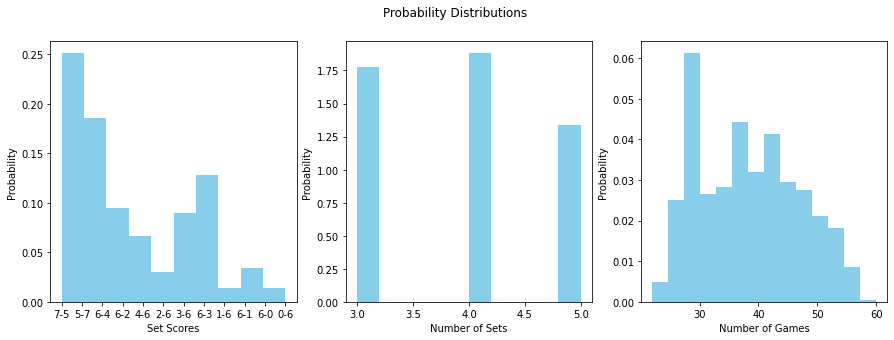

In [318]:
# Create axis for plots:
fig, axes = plt.subplots(1, 3, figsize = [15, 4.8])
fig.suptitle('Probability Distributions')

# Create probability distribution for the winner and set score:
axes[0].hist(AllSetScores, align = 'mid', density = True, color = 'skyblue')
axes[0].set(xlabel = 'Set Scores', ylabel = 'Probability')

# Create a probability distribution for the number of sets in the match:
axes[1].hist(NoSets, align = 'mid', density = True, color = 'skyblue')
axes[1].set(xlabel = 'Number of Sets', ylabel = 'Probability')

# Create a probability distribution for the number of games in the match:
axes[2].hist(NoGames, bins = 'auto', align = 'mid', density = True, color = 'skyblue')
axes[2].set(xlabel = 'Number of Games', ylabel = 'Probability')

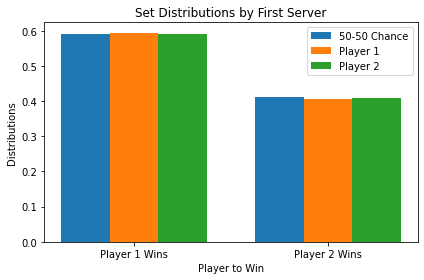

<Figure size 432x288 with 0 Axes>

In [29]:
FirstServer = ['Player 1 Wins', 'Player 2 Wins']
Dists = [[0.6121, 0.3879], [0.6399, 0.3601], [0.592, 0.408]]0.63881855 0.36118145
# Label Locations:
x = np.arange(len(FirstServer))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x-width, Dists[0], width, label = '50-50 Chance')
ax.bar(x, Dists[1], width, label = 'Player 1')
ax.bar(x+width, Dists[2], width, label = 'Player 2')


# Add labels:
ax.set_xlabel('Player to Win')
ax.set_ylabel('Distributions')
ax.set_title('Set Distributions by First Server')
ax.set_xticks(x)
ax.set_xticklabels(FirstServer)
ax.legend()

fig.tight_layout()
plt.show()

# Save figure:
plt.savefig('Set Distributions.png')